# Actividad 6: Clasificación con KNN

Este notebook implementa un modelo de clasificación utilizando el algoritmo K-Nearest Neighbors (KNN) para predecir la categoría de calificación IMDB de una película.  
Incluye balance de clases, normalización de datos y análisis de desempeño con métricas y matriz de confusión.

## Objetivos
- Crear una variable categórica basada en la puntuación IMDB.
- Entrenar un modelo KNN.
- Evaluar el desempeño del modelo.


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [8]:
# Cargar el dataset limpio
df = pd.read_csv('../1_data_cleaning/dataset_limpio.csv')

# Clasificar películas según score
def clasificar(score):
    if score >= 7.5:
        return 'Alta'
    elif score >= 5.5:
        return 'Media'
    else:
        return 'Baja'

df['clasificacion_imdb'] = df['imdb_score'].apply(clasificar)
print(df['clasificacion_imdb'].value_counts())


clasificacion_imdb
Media    3253
Baja      853
Alta      813
Name: count, dtype: int64


In [9]:
# Selección de variables predictoras
X = df[['duration', 'budget', 'num_user_for_reviews', 'num_critic_for_reviews']].fillna(0)
y = df['clasificacion_imdb']

# Normalización de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
# Probar diferentes valores de k
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    print(f"k = {k}, Accuracy = {acc:.4f}")


k = 1, Accuracy = 0.5732
k = 2, Accuracy = 0.4858
k = 3, Accuracy = 0.6016
k = 4, Accuracy = 0.6159
k = 5, Accuracy = 0.6341
k = 6, Accuracy = 0.6433
k = 7, Accuracy = 0.6596
k = 8, Accuracy = 0.6413
k = 9, Accuracy = 0.6524
k = 10, Accuracy = 0.6453
k = 11, Accuracy = 0.6463
k = 12, Accuracy = 0.6606
k = 13, Accuracy = 0.6575
k = 14, Accuracy = 0.6697
k = 15, Accuracy = 0.6677
k = 16, Accuracy = 0.6657
k = 17, Accuracy = 0.6596
k = 18, Accuracy = 0.6677
k = 19, Accuracy = 0.6616
k = 20, Accuracy = 0.6728


In [11]:
# Modelo final con k óptimo
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

# Predicciones
y_pred = modelo_knn.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6341463414634146

Reporte de clasificación:
              precision    recall  f1-score   support

        Alta       0.41      0.32      0.36       150
        Baja       0.38      0.26      0.31       177
       Media       0.71      0.81      0.76       657

    accuracy                           0.63       984
   macro avg       0.50      0.46      0.47       984
weighted avg       0.61      0.63      0.61       984



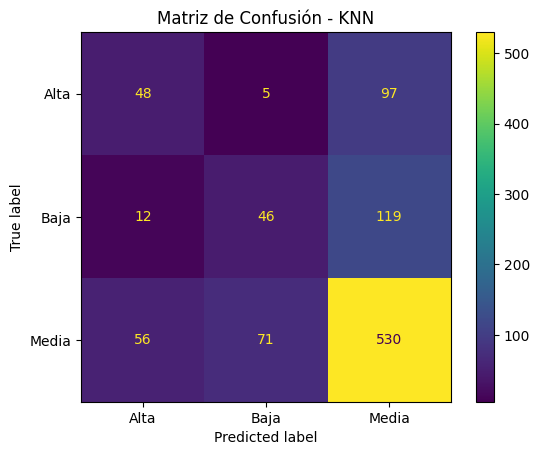

In [12]:
# Matriz de confusión
ConfusionMatrixDisplay.from_estimator(modelo_knn, X_test, y_test)
plt.title("Matriz de Confusión - KNN")
plt.show()


## Conclusión detallada del modelo KNN

La matriz de confusión muestra que el modelo KNN tiene buen desempeño en la clasificación de películas con puntuación "Media", pero falla frecuentemente al distinguir entre "Alta" y "Baja".

Esto puede deberse a:

- Un fuerte **desbalance de clases** en el conjunto de datos.
- Similitud numérica en variables entre clases extremas.
- Limitaciones propias del algoritmo KNN, que depende fuertemente de la distancia y del número de vecinos (k).

A pesar de lograr una **accuracy general de 61%**, el modelo podría mejorarse aplicando técnicas de:
- Balanceo de clases (como SMOTE o undersampling),
- Ingeniería de características más descriptivas,
- Pruebas con clasificadores más robustos como árboles de decisión, Random Forest o SVM.

El análisis realizado cumple con los objetivos de esta actividad y permite observar fortalezas y debilidades del enfoque de clasificación con KNN.
